In [6]:
from nltk.tokenize import word_tokenize
import re
import numpy as np
import matplotlib.pyplot as plt

In [7]:
text_raw = open(R"C:\Users\aredd\Desktop\adventure.txt",encoding='utf-8').read()
file = text_raw[2000:25000] # using only subset of file to avoid insufficient memory issues
file = file.lower()
file = re.sub('[^a-zA-Z]',' ',file)
file  = word_tokenize(file)

(-0.5, 399.5, 199.5, -0.5)

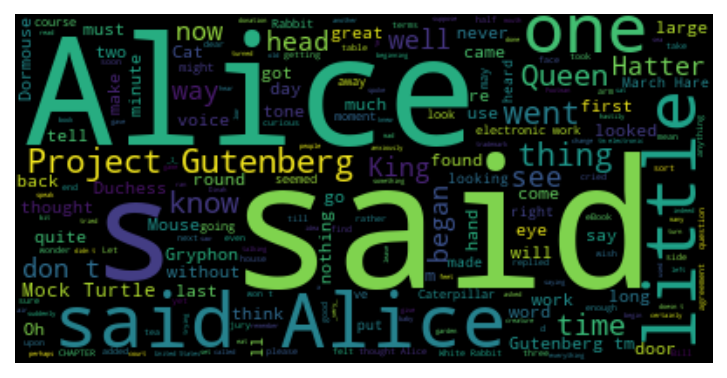

In [8]:
import wordcloud

# most frequent words
cloud = wordcloud.WordCloud().generate(text_raw)
fig = plt.gcf()
fig.set_size_inches(6,4)
fig.set_dpi(150)
plt.imshow(cloud,interpolation='bilinear')
plt.axis('off')

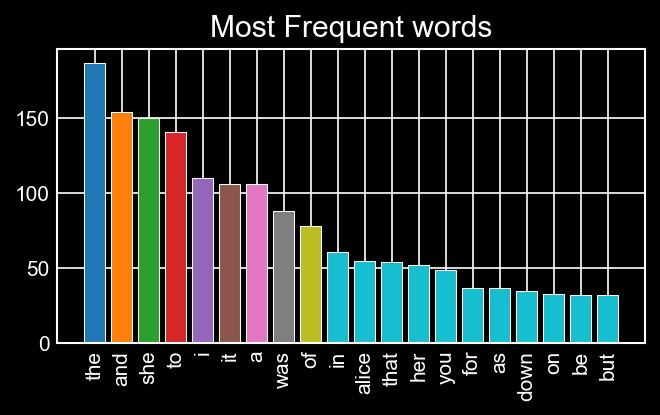

In [153]:
from collections import  Counter

c = Counter(file)

common = c.most_common(20)
name = []
val = []
for i in range(len(common)):
    name.append(common[i][0])
    val.append(common[i][1])

fig = plt.gcf()
fig.set_size_inches(4,2)
fig.set_dpi(150)

plt.style.use('tableau-colorblind10')

plt.title('Most Frequent words')
plt.xticks(rotation=90)
cmap = plt.get_cmap('tab10')
plt.bar([x for x in range(1,21)],val,tick_label=name,color=cmap(range(len(val))))
plt.show()

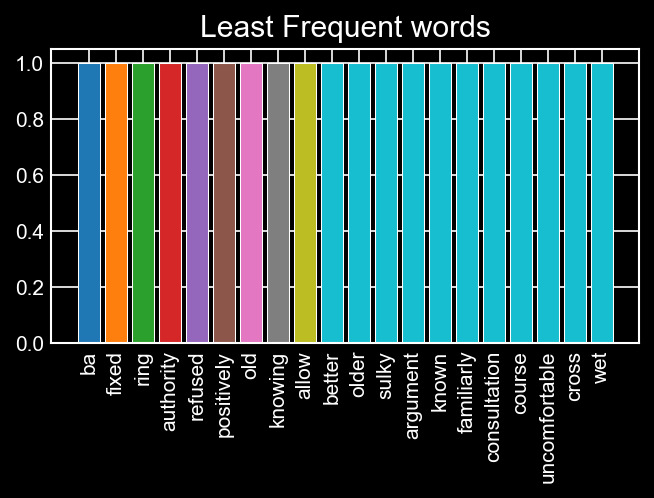

In [154]:
common = c.most_common()[::-1][:20]
name = []
val = []
for i in range(len(common)):
    name.append(common[i][0])
    val.append(common[i][1])
    
fig = plt.gcf()
fig.set_size_inches(4,2)
fig.set_dpi(150)

plt.title('Least Frequent words')

cmap = plt.get_cmap('tab10')
plt.bar([x for x in range(1,21)],val,tick_label=name,color=cmap(range(len(val))))


plt.xticks(rotation=90)

plt.show()
plt.show()

Although these words are rarely found in context, i will not be removing them as they may add grammer segmentation

In [9]:
vocab = sorted(list(set(file)))

# mapping (Vectorization)
char_to_int = dict((i,c) for c,i in enumerate(vocab))
int_to_char = dict((c,i) for c,i in enumerate(vocab))

In [10]:
vocab_size = len(vocab)
SEQ_LEN = 40
NEXT_SEQ_LEN = 1

In [11]:
sentences=[]
next_sentences=[]

# data preparation
for i in range(len(file)-SEQ_LEN-NEXT_SEQ_LEN):
    stride = SEQ_LEN + i
    sent_tmp = file[i:stride]
    next_tmp = file[stride:stride + NEXT_SEQ_LEN]
    sentences.append([char_to_int[x] for x in sent_tmp])
    next_sentences.append([char_to_int[x] for x in next_tmp])

In [12]:
# one hot encoding
n_sent = len(sentences)
X = np.zeros((n_sent,SEQ_LEN,vocab_size))
y = np.zeros((n_sent,vocab_size))
for i,sentence in enumerate(sentences):
    for j,val in enumerate(sentence):
        X[i,j,val] = 1
    y[i,next_sentences[i]] = 1

In [13]:
from tensorflow.keras.layers import Embedding,LSTM,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy

model  = Sequential([
    LSTM(128,input_shape=(SEQ_LEN,vocab_size),return_sequences=True,dropout=0.3),
    LSTM(128,dropout=0.1),
    Dense(100),
    Dense(vocab_size,activation='softmax')
])

In [14]:
model.compile('adam',CategoricalCrossentropy(),['accuracy'])
hist = model.fit(X,y,epochs=110,verbose=0)

Text(0, 0.5, 'loss')

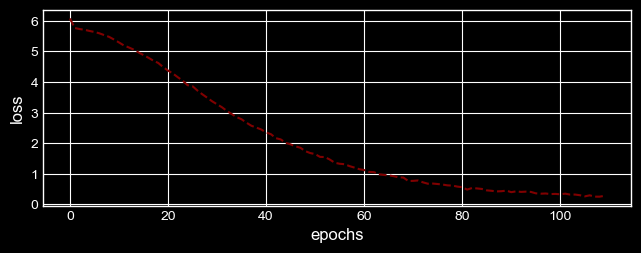

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt


fig = plt.gcf()
fig.set_size_inches(6,2)
fig.set_dpi(100)

# sns.set_style('whitegrid')
plt.plot(hist.history['loss'],linestyle='--',color='maroon')
plt.xlabel('epochs')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

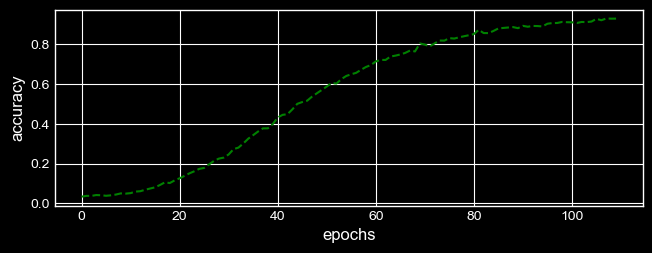

In [157]:
fig = plt.gcf()
fig.set_size_inches(6,2)
fig.set_dpi(100)

plt.plot(hist.history['accuracy'],linestyle='--',color='green')
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [17]:
import sys
import time

idx = np.random.randint(1,high=len(file)-1000)

# using same sentences in the training for casual checking
for i in range(10):
    pred_sent = file[idx:idx+SEQ_LEN]
    X_test = np.zeros((1,SEQ_LEN,vocab_size))
    for i,sentence in enumerate(pred_sent):
        X_test[0,i,char_to_int[sentence]] = 1

    y_pred = model.predict(X_test,verbose=0)
    op_idx = np.argmax(y_pred)
    idx = idx + SEQ_LEN
    pred_sent = pred_sent[1:]
    pred_sent = ' '.join(pred_sent[1:]) +' [' + vocab[op_idx] + '] '  # =>[Predicted words]
    for i in pred_sent:
        sys.stdout.write(i)
        sys.stdout.flush()
        time.sleep(0.0)

for showing off her knowledge as there was no one to listen to her still it was good practice to say it over yes that s about the right distance but then i wonder what latitude or longitude [i] got to alice had no idea what latitude was or longitude either but thought they were nice grand words to say presently she began again i wonder if i shall fall right through the earth how funny it [ll] to come out among the people that walk with their heads downward the antipathies i think she was rather glad there was no one listening this time as it didn t sound at all the right word but [i] have to ask them what the name of the country is you know please ma am is this new zealand or australia and she tried to curtsey as she spoke fancy curtseying as you re falling through the [air] you think you could manage it and what an ignorant little girl she ll think me for asking no it ll never do to ask perhaps i shall see it written up somewhere down down down there was [nothing] to do so alice soon 

In [18]:
# using Random words
idx = np.random.randint(1,high=len(file)-1000)

for i in range(10):
    pred_sent = file[idx:idx+SEQ_LEN]
    shuffled_arr = np.random.permutation(pred_sent)
    X_test = np.zeros((1,SEQ_LEN,vocab_size))
    for i,sentence in enumerate(shuffled_arr):
        X_test[0,i,char_to_int[sentence]] = 1

    y_pred = model.predict(X_test,verbose=0)
    op_idx = np.argmax(y_pred)
    idx = idx + SEQ_LEN
    pred_sent = ' '.join(pred_sent[1:]) +' PREDICTED[' + vocab[op_idx] + ']'
    for i in pred_sent:
        sys.stdout.write(i)
        sys.stdout.flush()
        time.sleep(0.03)

longed to get out of that dark hall and wander about among those beds of bright flowers and those cool fountains but she could not even get her head through the doorway and even if my head would go PREDICTED[sure]thought poor alice it would be of very little use without my shoulders oh how i wish i could shut up like a telescope i think i could if i only knew how to begin for you see so PREDICTED[after]out of the way things had happened lately that alice had begun to think that very few things indeed were really impossible there seemed to be no use in waiting by the little door so she went back to PREDICTED[too]table half hoping she might find another key on it or at any rate a book of rules for shutting people up like telescopes this time she found a little bottle on it which certainly was not here before PREDICTED[another]alice and round the neck of the bottle was a paper label with the words drink me beautifully printed on it in large letters it was all very well to say drink me but

In [19]:
from tensorflow.keras.utils import pad_sequences

samp_text = 'yesterday your wooden uncomfortable watch stop'

for i in range(100):
    samp = samp_text.split()[i:i+40]
    pred = [char_to_int[x] for x in samp]
    pred = pad_sequences([pred],padding='pre',maxlen=40)

    pred_X = np.zeros((1,SEQ_LEN,vocab_size))
    for i,text in enumerate(pred):
        for j,val in enumerate(text):     
            pred_X[0,j,val] = 1
    pred_tex = vocab[np.argmax(model.predict(pred_X,verbose = 0))]
    samp_text += ' ' + pred_tex
for i  in samp_text.split():
    sys.stdout.write(i +' ')
    sys.stdout.flush()
    time.sleep(0.15)

yesterday your wooden uncomfortable watch stop burning of some had but it the things once in herself and she was to noticed herself in it swam into the things and in herself but it was the fan she was was into the passage was in get which was was to get her as in was was to her overhead before was was another slowly as she was plenty of time as it went after the things was talking get but it was overhead before her was her slowly as she was plenty of time as it went after the things was talking get but it was 